In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [11]:
data_path ="C:/Users/Elif/Desktop/diamonds.csv"
diamonds_data = pd.read_csv(data_path)

In [12]:
print("Veri seti bilgileri:\n", diamonds_data.info())
print("\nEksik değerlerin sayısı:\n", diamonds_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
Veri seti bilgileri:
 None

Eksik değerlerin sayısı:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [13]:
categorical_cols = ["cut", "color", "clarity"]
label_encoder = LabelEncoder()
for col in categorical_cols:
    diamonds_data[col] = label_encoder.fit_transform(diamonds_data[col])

In [14]:
X = diamonds_data.drop(columns=["price"])
y = diamonds_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print("\nEğitim seti doğruluk skoru:", train_accuracy)
print("Test seti doğruluk skoru:", test_accuracy)


Eğitim seti doğruluk skoru: 0.88504407867572
Test seti doğruluk skoru: 0.8851397433679631


In [16]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [17]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

n = len(X_train)
p = X_train.shape[1]
adjusted_r2_train = 1 - (1 - train_accuracy) * (n - 1) / (n - p - 1)
n = len(X_test)
p = X_test.shape[1]
adjusted_r2_test = 1 - (1 - test_accuracy) * (n - 1) / (n - p - 1)

print("Eğitim seti Adjusted R2:", adjusted_r2_train)
print("Test seti Adjusted R2:", adjusted_r2_test)
print("\nEğitim seti MSE:", train_mse)
print("Test seti MSE:", test_mse)
print("\nEğitim seti MAE:", train_mae)
print("Test seti MAE:", test_mae)

Eğitim seti Adjusted R2: 0.8850200973282647
Test seti Adjusted R2: 0.8850438311106159

Eğitim seti MSE: 1830068.2345561867
Test seti MSE: 1825912.9915253492

Eğitim seti MAE: 863.0738090430266
Test seti MAE: 858.7084697710093


In [18]:
new_data = {
    "carat": [0.23],
    "cut": [75],
    "color": [1],  # yes için 1, no için 0
    "clarity": [6],
    "depth": [61.5],
    "table":[55],
    "x":[1],
    "y":[1],
    "z":[1]
}
new_data_df = pd.DataFrame(new_data)

predicted_performance = model.predict(new_data_df)

print("Tahmin Edilen Performance Index:", predicted_performance)

Tahmin Edilen Performance Index: [9620.3233559]


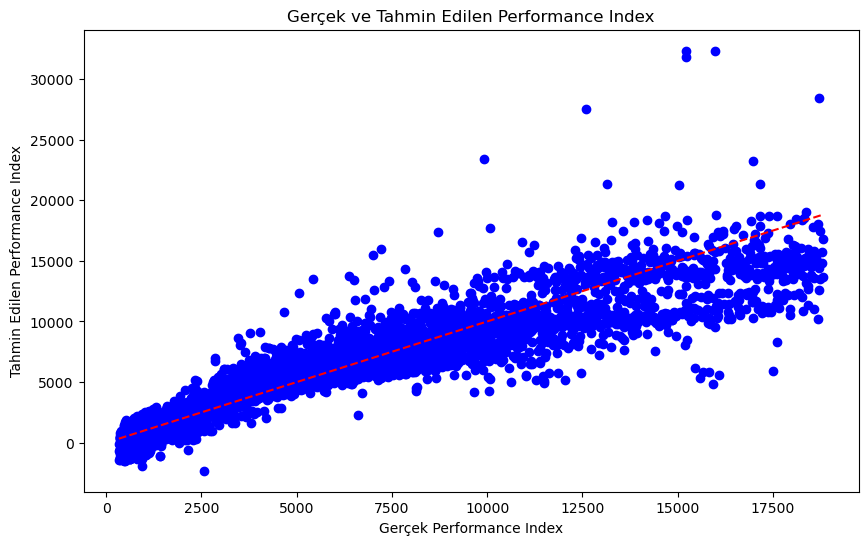

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Gerçek Performance Index")
plt.ylabel("Tahmin Edilen Performance Index")
plt.title("Gerçek ve Tahmin Edilen Performance Index")
plt.show()